In [25]:
#installing library
!pip install yfinance

**IMPORTING THE LIBRARIES**

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [27]:
symbol = '^SPX'
end = date.today()
start = end.replace(year = 2022)


# Read data
df = yf.download(symbol,start,end)

df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-26,4888.910156,4906.689941,4881.470215,4890.970215,4890.970215,3353400000
2024-01-29,4892.950195,4929.310059,4887.399902,4927.930176,4927.930176,3525160000
2024-01-30,4925.890137,4931.089844,4916.270020,4924.970215,4924.970215,3836130000
2024-01-31,4899.189941,4906.750000,4845.149902,4845.649902,4845.649902,4696120000
2024-02-01,4861.109863,4906.970215,4853.520020,4906.189941,4906.189941,4386090000


In [28]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-02,4566.390137,4595.310059,4544.319824,4589.379883,4589.379883,4481580000
2022-02-03,4535.410156,4542.879883,4470.390137,4477.439941,4477.439941,4401970000
2022-02-04,4482.790039,4539.660156,4451.500000,4500.529785,4500.529785,4706290000
2022-02-07,4505.750000,4521.859863,4471.470215,4483.870117,4483.870117,4228480000
2022-02-08,4480.020020,4531.319824,4465.399902,4521.540039,4521.540039,4459620000


In [29]:
symbol = '^SPX'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [30]:
dfo.options  #to get the date of different expiration time

('2024-02-02',
 '2024-02-05',
 '2024-02-06',
 '2024-02-07',
 '2024-02-08',
 '2024-02-09',
 '2024-02-12',
 '2024-02-13',
 '2024-02-14',
 '2024-02-15',
 '2024-02-16',
 '2024-02-20',
 '2024-02-21',
 '2024-02-22',
 '2024-02-23',
 '2024-02-26',
 '2024-02-27',
 '2024-02-28',
 '2024-02-29',
 '2024-03-01',
 '2024-03-04',
 '2024-03-05',
 '2024-03-08',
 '2024-03-11',
 '2024-03-15',
 '2024-03-28',
 '2024-04-19',
 '2024-04-30',
 '2024-05-17',
 '2024-05-31',
 '2024-06-21',
 '2024-06-28',
 '2024-07-19',
 '2024-08-16',
 '2024-09-20',
 '2024-09-30',
 '2024-10-18',
 '2024-11-15',
 '2024-12-20',
 '2024-12-31',
 '2025-01-17',
 '2025-02-21',
 '2025-03-21',
 '2025-06-20',
 '2025-12-19',
 '2026-03-20',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [31]:
dfo_exp = dfo.option_chain(dfo.options[1])  #we can change index to try on different expiry dates

In [32]:
dfo_exp.calls.head() #Data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW240205C01200000,2024-01-19 15:36:15+00:00,1200.0,3594.75,3752.4,3760.4,0.00000,0.000000,2.0,1,5.437991,True,REGULAR,USD
1,SPXW240205C04050000,2024-01-02 20:36:11+00:00,4050.0,697.54,854.2,862.1,0.00000,0.000000,1.0,1,0.000010,True,REGULAR,USD
2,SPXW240205C04100000,2024-01-02 20:36:11+00:00,4100.0,648.25,803.6,812.1,0.00000,0.000000,1.0,1,0.000010,True,REGULAR,USD
3,SPXW240205C04250000,2024-02-02 16:57:05+00:00,4250.0,701.60,700.9,708.8,90.28998,14.769918,2.0,2,0.641849,True,REGULAR,USD
4,SPXW240205C04300000,2024-01-30 15:00:30+00:00,4300.0,627.23,654.8,662.7,0.00000,0.000000,1.0,11,0.595341,True,REGULAR,USD


# **Calculation of u and d**

u =size of the up move factor=
 e^{σ\sqrt{t}}, and

d =size of the down move factor=
 = e^{−σ\sqrt{t}}
 = 1/ u

σ is the annual volatility of the underlying asset’s returns and t is the length of the step in the binomial model.

To calculate annual volatility:-

First calculate the daily returns of the asset

Then calculate its standard deviation

Then multiply it by sqrt(252) as in a year there are 252 trading days.



In [33]:
#Calculation of daily returns
ret = df['Adj Close'].pct_change()

In [34]:
#Remove nan if any
ret.head()

Date
2022-02-02         NaN
2022-02-03   -0.024391
2022-02-04    0.005157
2022-02-07   -0.003702
2022-02-08    0.008401
Name: Adj Close, dtype: float64

In [35]:
#Calculation of daily standard deviation
daily_vol = ret.std()

In [36]:
daily_vol

0.012120361365834085

In [37]:
#Calculate annual volatility from daily volatility
vol = daily_vol*np.sqrt(252)

In [38]:
vol

0.19240477184539287

In [39]:
dfo.options[1]

'2024-02-05'

In [40]:
date.today()

datetime.date(2024, 2, 2)

In [41]:
N = 100
T = 8.0/365      #Calculate the number of days left for expiry from your calculation in years
t = T/N

In [42]:
u = np.exp(vol*np.sqrt(t))    #Calculate u from the above formula
u

1.0028525488352564

In [43]:
d = np.exp(-vol*np.sqrt(t))   #Similarly calculate d
d

0.9971555650543347

# Binomial Pricing model for call option

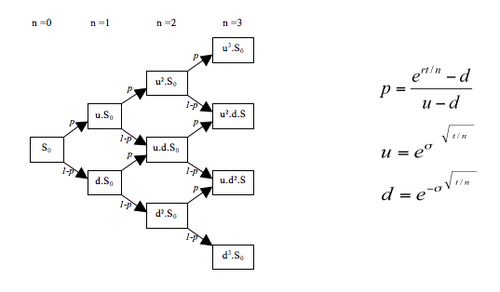

In [44]:
def first_binomial_call(S, K, T, r, u, d, N):
    stock_prices = {}
    option_values = {}
    delta_T = T / N
    p = (np.exp(r * delta_T) - d) / (u - d)

    for k in range(N + 1):
        stock_prices[(N, k)] = S * (u ** k) * (d ** (N - k))

    for k in range(N + 1):
        option_values[(N, k)] = max(stock_prices[(N, k)] - K, 0)

    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            stock_prices[(i, j)] = S * (u ** j) * (d ** (i - j))
            option_values[(i, j)] = np.exp(-r * delta_T) * (p * option_values[(i + 1, j + 1)] + (1 - p) * option_values[(i + 1, j)])

    return option_values

In [45]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated by n step binomial model
call = {}
for K in dfo_exp.calls['strike']:
    call_price = first_binomial_call(S = df['Close'][len(df)-1], K = K, T = T, r=0.01*t, u = u, d =d, N=N)[(1, 1)]
  # print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call.head()

,th_call
1200.0,3720.185145
4050.0,870.185280
4100.0,820.185283
4250.0,670.185291
4300.0,620.185307


In [46]:
#price of actual calls
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()


,ac_call
strike,
1200.0,3594.75
4050.0,697.54
4100.0,648.25
4250.0,701.60
4300.0,627.23


In [47]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
1200.0,3720.185145,3594.75
4050.0,870.185280,697.54
4100.0,820.185283,648.25
4250.0,670.185291,701.60
4300.0,620.185307,627.23
4350.0,570.185424,575.73
4370.0,550.185601,516.67
4375.0,545.185650,547.23
4380.0,540.185731,552.47
4400.0,520.186221,526.37


<Axes: >

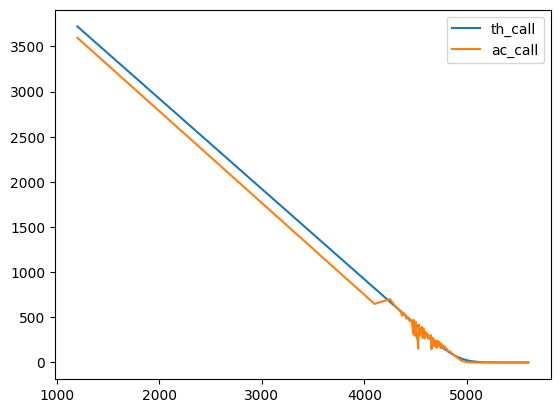

In [48]:
call.plot() #plotting the actual and theoretical option prices